Tapesh Chandra Das RA2111003010206
Rishi Maniktala RA2111003010191


Financial anomaly detection

Problem Statement:
Financial anomaly detection is crucial for safeguarding against fraudulent activities, which can lead to significant financial losses for both institutions and individuals. Inadequate detection methods not only undermine trust in the financial system but also perpetuate socioeconomic disparities by disproportionately affecting vulnerable populations.

Societal Impact:
Ineffective anomaly detection amplifies economic instability, threatens personal financial security, and widens socioeconomic inequalities. It erodes trust in financial institutions, leading to market uncertainty and hindering economic growth. Vulnerable individuals bear the brunt, facing devastating financial consequences that perpetuate cycles of poverty and exclusion. Addressing this challenge is essential for maintaining a resilient and inclusive financial ecosystem.


Abstract:

This paper explores anomaly detection in financial data, crucial for detecting fraud and errors. It examines various techniques, including statistical methods and machine learning algorithms, addressing challenges like high dimensionality and imbalanced data. Real-world applications include fraud detection and risk management. The aim is to equip practitioners and researchers with effective anomaly detection strategies for financial systems.

Dataset Description:

1. step: This column represents discrete units of time or transaction steps. It indicates the chronological order of    transactions.

2. type: This column denotes the type of transaction being performed, such as 'PAYMENT', 'TRANSFER', 'DEBIT', 'CASH_OUT', or    'CASH_IN'. Each type represents a different category of financial activity.

3. amount: This column specifies the monetary value of each transaction. It represents the amount of money being transferred or transacted.

4. nameOrig: This column contains unique identifiers or names for the originators of the transactions. It identifies the individuals or accounts initiating the transactions.

5. oldbalanceOrg: This column represents the balance of the originator's account before the transaction occurs. It provides a baseline for understanding the impact of the transaction on the account balance.

6. newbalanceOrig: This column represents the balance of the originator's account after the transaction is completed. It shows how the transaction affects the account balance.

7. nameDest: This column contains unique identifiers or names for the recipients or destinations of the transactions. It identifies the individuals or accounts receiving the transactions.

8. oldbalanceDest: This column represents the balance of the destination account before the transaction occurs. It provides a baseline for understanding the impact of the transaction on the destination account balance.

9. newbalanceDest: This column represents the balance of the destination account after the transaction is completed. It shows how the transaction affects the destination account balance.

10. isFraud: This binary column indicates whether the transaction is fraudulent (1) or not (0). It serves as the target variable for detecting fraudulent activity in the dataset.

11. isFlaggedFraud: This binary column indicates whether a transaction has been flagged as potentially fraudulent (1) or not   (0). It may be set based on specific criteria determined by fraud detection systems.

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  49999.000000  4.999900e+04   4

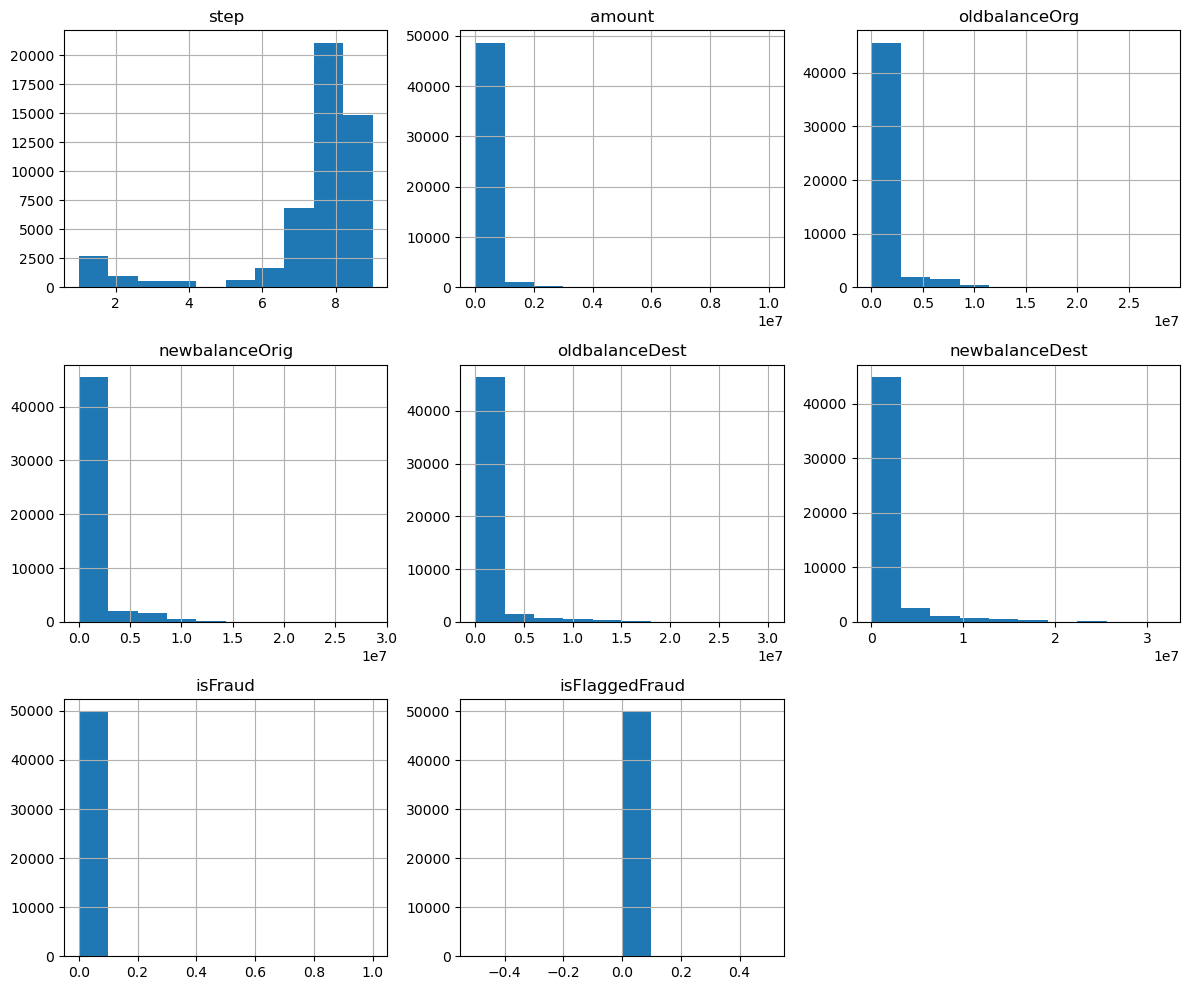

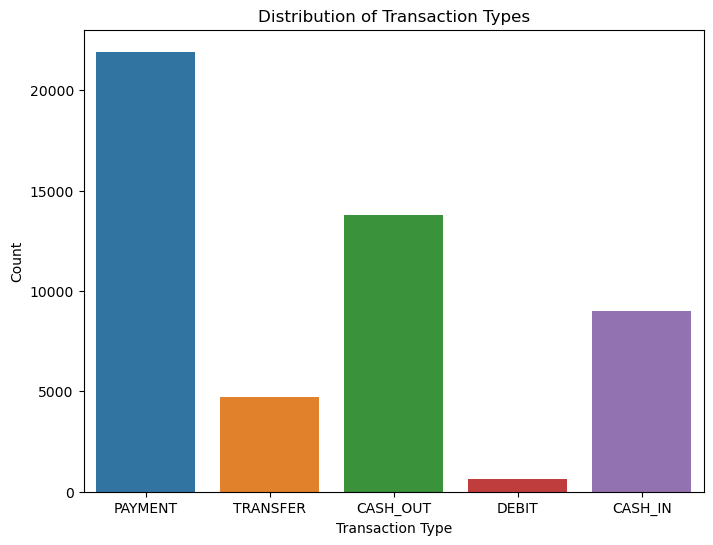

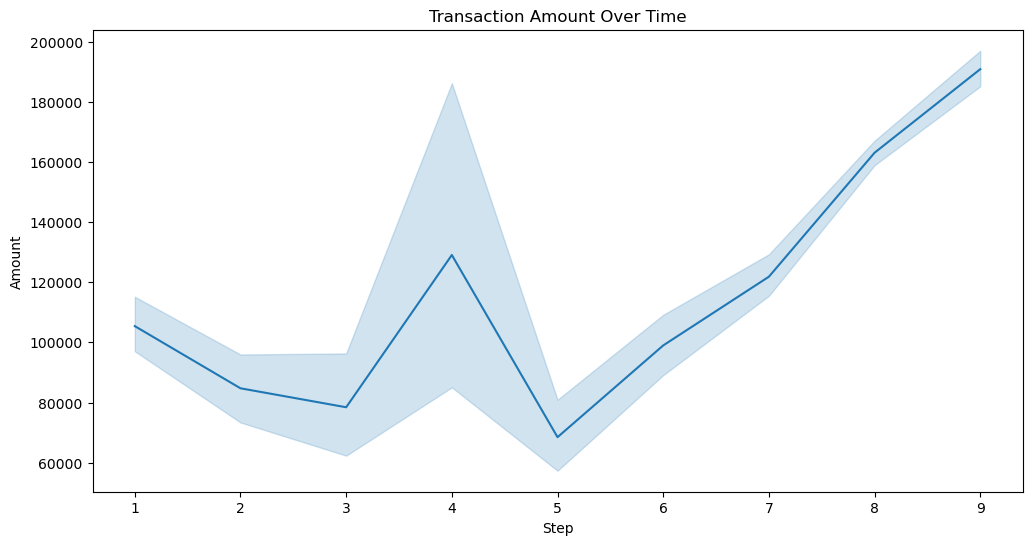

Percentage of fraudulent transactions: 0.2000040000800016


C:\Users\sande\AppData\Local\Temp\ipykernel_3540\2052305800.py:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


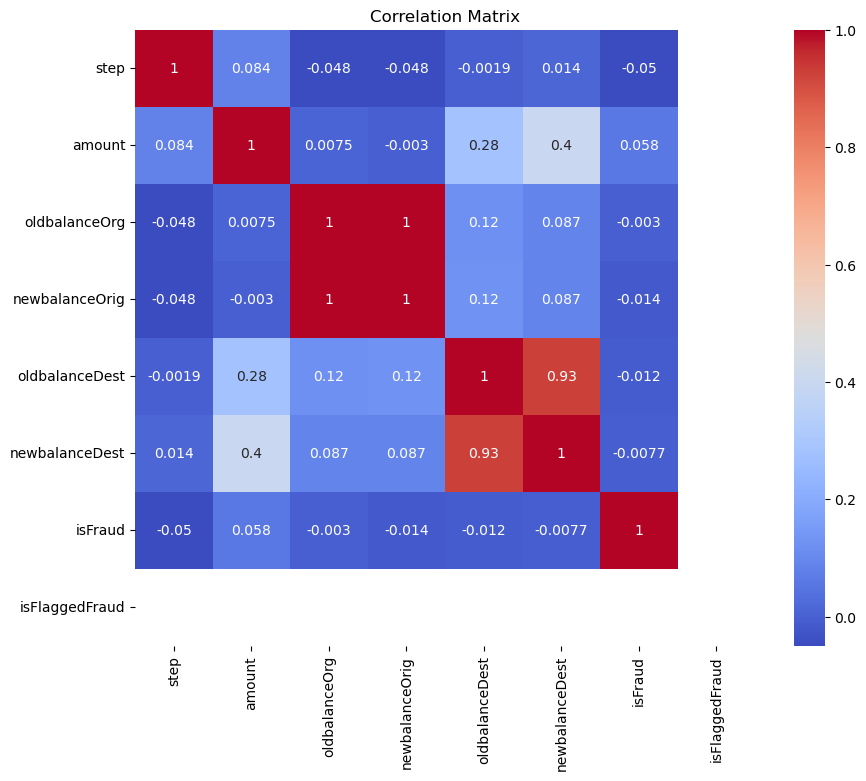

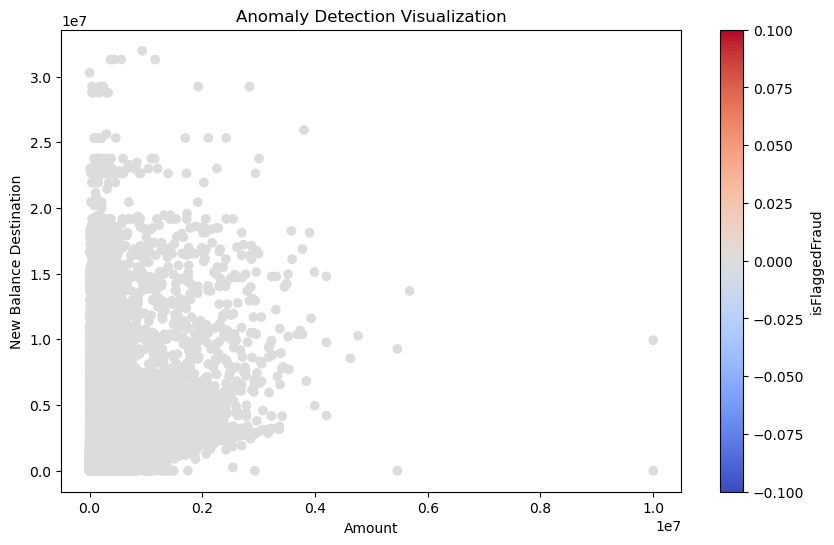

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_excel("50K.xlsx")

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Distribution of numerical features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Distribution of categorical features
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Transaction patterns over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='step', y='amount', data=data)
plt.title('Transaction Amount Over Time')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.show()

# Fraud analysis
fraud_percentage = (data['isFraud'].sum() / len(data)) * 100
print("Percentage of fraudulent transactions:", fraud_percentage)

# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Anomaly detection visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['amount'], data['newbalanceDest'], c=data['isFlaggedFraud'], cmap='coolwarm')
plt.xlabel('Amount')
plt.ylabel('New Balance Destination')
plt.title('Anomaly Detection Visualization')
plt.colorbar(label='isFlaggedFraud')
plt.show()


Isolation Forest is a popular algorithm for anomaly detection because of several reasons:

Efficiency: Isolation Forest is efficient in detecting anomalies in large datasets. It constructs a binary tree structure by randomly selecting features and splitting values, which allows it to quickly isolate anomalies from normal instances.

Scalability: It performs well on high-dimensional data, which is common in many real-world datasets such as network traffic data, sensor data, or financial transactions.

Robustness to outliers: Isolation Forest is robust to outliers because it isolates anomalies by randomly selecting features and creating partitions. This makes it less sensitive to outliers compared to other techniques like k-means or distance-based methods.

Simple Implementation: The algorithm is relatively simple to implement and understand compared to some other anomaly detection methods like neural networks or support vector machines.

No need for labeled data: Isolation Forest is an unsupervised learning algorithm, meaning it doesn't require labeled data for training. It can detect anomalies solely based on the characteristics of the data itself, making it suitable for tasks where labeled data is scarce or unavailable.

Suitability for streaming data: Isolation Forest can adapt well to streaming data because it builds a tree structure iteratively, making it capable of handling data arriving in real-time.

Overall, Isolation Forest is a versatile algorithm that offers efficient and effective anomaly detection capabilities across various types of datasets.



C:\Users\sande\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


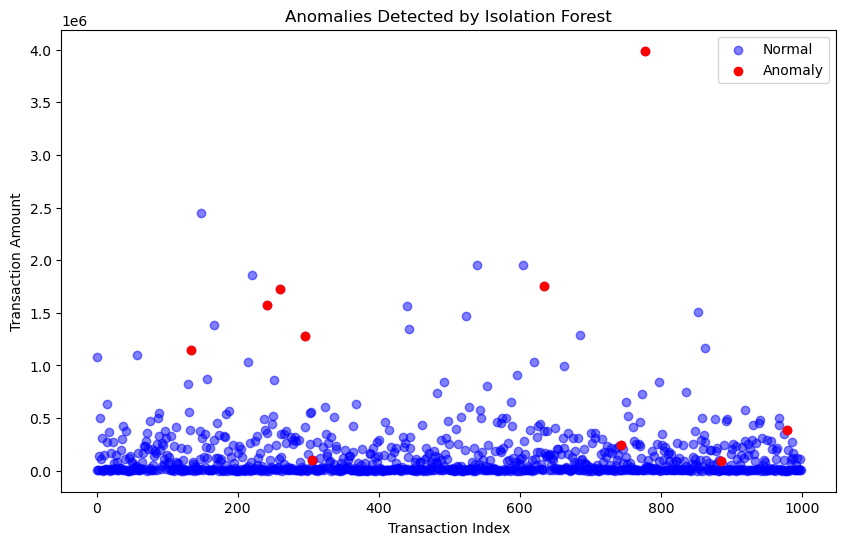

Detected anomalies:
     step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
134     8     4  1145183.56       133     6163353.68      5018170.12   
242     8     4  1575635.01        27       27195.07            0.00   
260     1     4  1724887.05       241           0.00            0.00   
295     6     4  1280020.98         0           0.00            0.00   
306     3     0    99657.13       917     4597727.16      4697384.29   
635     9     4  1751803.52       954           0.00            0.00   
743     6     0   243542.61       728     1931765.07      2175307.69   
777     8     4  3989315.70       420           0.00            0.00   
885     7     0    93766.05       750      808919.51       902685.56   
979     8     0   388365.43       958    25489280.44     25877645.87   

     nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
134       272      6561493.61      8171413.33        0               0   
242       327     14149440.73     15639

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Load the transaction data
data = pd.read_csv(r"C:\Users\sande\OneDrive\Desktop\trimmed_dataset.csv")  # Assuming the data is stored in a CSV file named "transaction_data.csv"

# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data['nameOrig'] = label_encoder.fit_transform(data['nameOrig'])
data['nameDest'] = label_encoder.fit_transform(data['nameDest'])

# Select relevant features for anomaly detection
features = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 
            'nameDest', 'oldbalanceDest', 'newbalanceDest']

# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Assuming a contamination rate of 1%
model.fit(data[features])

# Predict anomalies
data['anomaly'] = model.predict(data[features])

# Anomalies will be marked as -1, normal instances will be marked as 1
anomalies = data[data['anomaly'] == -1]

# Plotting the distribution of normal and anomalous transactions
plt.figure(figsize=(10, 6))

plt.scatter(data.index, data['amount'], label='Normal', c='blue', alpha=0.5)
plt.scatter(anomalies.index, anomalies['amount'], label='Anomaly', c='red')

plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.legend()

plt.show()

# Print detected anomalies
print("Detected anomalies:")
print(anomalies)


C:\Users\sande\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


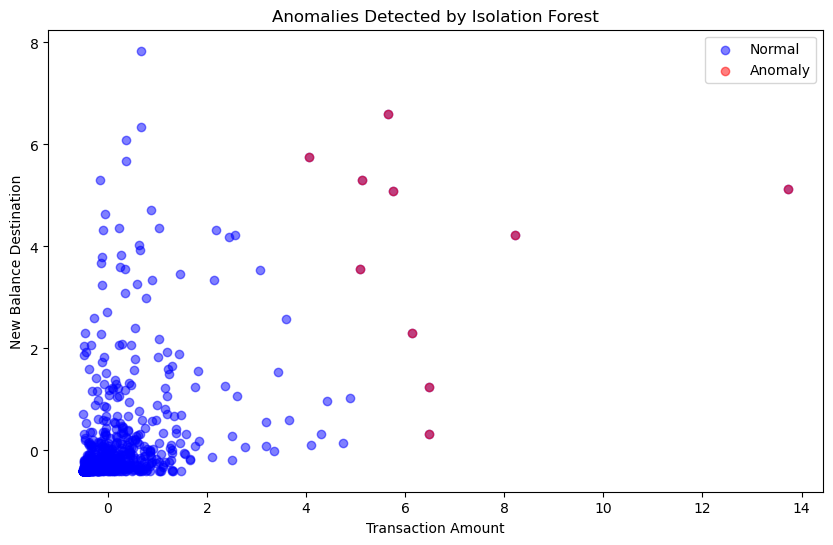

Detected anomalies:
     step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
148     8  TRANSFER   8.225296  C1963167586           0.00             0.0   
220     7  TRANSFER   6.135627  C1341036477           0.00             0.0   
242     8  TRANSFER   5.120270  C1051061138       27195.07             0.0   
260     1  TRANSFER   5.652383  C1495608502           0.00             0.0   
295     6  TRANSFER   4.066348  C1000719581           0.00             0.0   
440     6  TRANSFER   5.087967   C132930221           0.00             0.0   
540     8  TRANSFER   6.470497  C1545695174     1836964.18             0.0   
605     9  TRANSFER   6.483832  C1706449883       40147.00             0.0   
635     9  TRANSFER   5.748346   C909676929           0.00             0.0   
777     8  TRANSFER  13.725515  C1856743149           0.00             0.0   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
148   C423580937     10235447.92        4.22

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load the transaction data
data = pd.read_csv(r"C:\Users\sande\OneDrive\Desktop\trimmed_dataset.csv")  # Assuming the data is stored in a CSV file named "trimmed_dataset.csv"

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['amount', 'newbalanceDest']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Select relevant features for anomaly detection
features = ['amount', 'newbalanceDest']

# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Assuming a contamination rate of 1%
model.fit(data[features])

# Predict anomalies
data['anomaly'] = model.predict(data[features])

# Anomalies will be marked as -1, normal instances will be marked as 1
anomalies = data[data['anomaly'] == -1]

# Plotting the distribution of normal and anomalous transactions
plt.figure(figsize=(10, 6))
plt.scatter(data['amount'], data['newbalanceDest'], c='blue', alpha=0.5, label='Normal')
plt.scatter(anomalies['amount'], anomalies['newbalanceDest'], c='red', alpha=0.5, label='Anomaly')

plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Transaction Amount')
plt.ylabel('New Balance Destination')
plt.legend()
plt.show()

# Print detected anomalies
print("Detected anomalies:")
print(anomalies)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_excel(r"C:\Users\kunta\Downloads\50K.xlsx")

# Define features and target variable
features = ['amount', 'oldbalanceDest']
target = 'isFraud'

# Split the dataset into features and target
X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Isolation Forest": IsolationForest(contamination=0.01),
    "Local Outlier Factor": LocalOutlierFactor(contamination=0.01),
    "One-Class SVM": OneClassSVM(nu=0.01)
}

# Evaluate each model
evaluation_results = {}
for name, model in models.items():
    model.fit(X_train)
    
    # Special handling for Local Outlier Factor
    if name == "Local Outlier Factor":
        anomalies = model.fit_predict(X_test) == -1
    else:
        anomalies = model.predict(X_test) == -1
    
    # Invert the anomalies predictions for easier comparison with true labels
    y_pred = np.where(anomalies, 1, 0)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly'], output_dict=True)
    evaluation_results[name] = {'accuracy': accuracy, 'report': report}

# Print evaluation results
for name, result in evaluation_results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['report'])
    print("\n")




Model: Isolation Forest
Accuracy: 0.9897
Classification Report:
{'Normal': {'precision': 0.9979830576845502, 'recall': 0.9916825333199719, 'f1-score': 0.9948228198039708, 'support': 9979.0}, 'Anomaly': {'precision': 0.011904761904761904, 'recall': 0.047619047619047616, 'f1-score': 0.019047619047619046, 'support': 21.0}, 'accuracy': 0.9897, 'macro avg': {'precision': 0.5049439097946561, 'recall': 0.5196507904695098, 'f1-score': 0.5069352194257949, 'support': 10000.0}, 'weighted avg': {'precision': 0.9959122932634127, 'recall': 0.9897, 'f1-score': 0.9927736918823824, 'support': 10000.0}}


Model: Local Outlier Factor
Accuracy: 0.9883
Classification Report:
{'Normal': {'precision': 0.9980808080808081, 'recall': 0.9901793766910512, 'f1-score': 0.9941143920720359, 'support': 9979.0}, 'Anomaly': {'precision': 0.02, 'recall': 0.09523809523809523, 'f1-score': 0.03305785123966942, 'support': 21.0}, 'accuracy': 0.9883, 'macro avg': {'precision': 0.5090404040404041, 'recall': 0.5427087359645733, 